# Matching Pennies Session Analysis


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Import the analysis functions
# Make sure the .py file is in the same directory as this notebook
from session_analysis import *

# Load and Filter Data
Load data from .parquet file and filter columns where ignore is not = 0

In [2]:
# Load the data
data_path = 'Z:/delab/matchingpennies/matchingpennies_datatable.parquet'
df = load_data(data_path)

print(f"Loaded data shape: {df.shape}")
print("\nColumns in the dataset:")
print(df.columns.tolist())

Loaded data shape: (310470, 26)

Columns in the dataset:
['subjid', 'date', 'protocol', 'sessid', 'trialnum', 'choice', 'reward', 'smoothed_reward_rate', 'comp_prediction', 'min_pvalue', 'pattern', 'pattern_length', 'RT', 'leftlicknum', 'rightlicknum', 'ignore', 'SoundTimestamp', 'ExtendPortTimestamp', 'LickTimestamp', 'left_reward_prob', 'right_reward_prob', 'fluorescence', 'pupil', 'p_stochastic', 'p_leftbias', 'p_rightbias']


# Get available Subjects and Sessions

In [ ]:
subjects = df['subjid'].unique()
print(f"Number of unique subjects: {len(subjects)}")
print("Sample subjects:")
print(subjects[:35])

# Analyze specific Subjects and Sessions

In [8]:
selected_subject = "JOA-M-0013"
subject_sessions = df[df['subjid'] == selected_subject]['sessid'].unique()

print(f"Sessions for subject {selected_subject}:")
print(f"Total number of sessions: {len(subject_sessions)}")
print("\nSession IDs:")
print((subject_sessions)) 

Sessions for subject JOA-M-0013:
Total number of sessions: 57

Session IDs:
[ 716.  717.  718.  722.  723.  724.  730.  766.  767.  768.  775.  776.
  782.  783.  813.  814.  815.  817.  818.  940.  941.  942.  943.  944.
  964.  969.  971.  973.  974. 1179. 1180. 1181. 1182. 1185. 1187. 1188.
 1191. 1193. 1207. 1208. 1209. 1247. 1248. 1271. 1305. 1311. 1342. 1343.
 1375. 1376. 1377. 1404. 1406. 1407. 1409. 1516. 1517.]


In [9]:
subject_id = selected_subject
session_id = 974.0

print(f"Analyzing subject {subject_id}, session {session_id}")

num_trials = len(df[(df['subjid'] == subject_id) & (df['sessid'] == session_id)])
print(f"Number of trials: {num_trials}")

Analyzing subject JOA-M-0013, session 974.0
Number of trials: 342


## 1. Plot Choice History

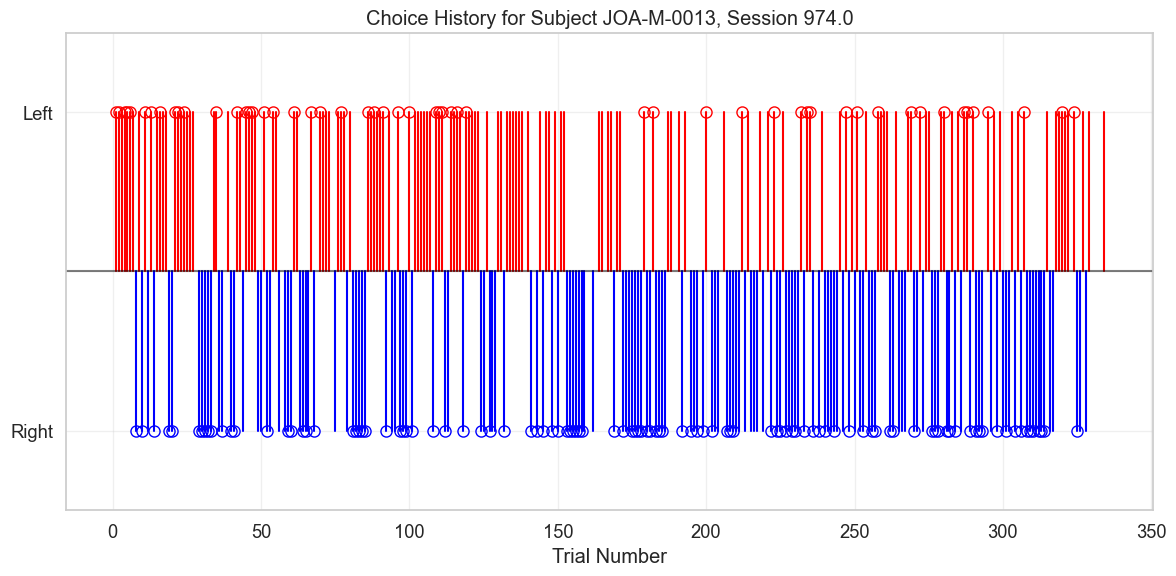

In [10]:
# Plot choice history
fig = plot_choice_history(df, subject_id, session_id)
plt.show()
plt.close(fig)

## 2. Plot Reward Rate
Either using default window_size (True) or 10% of Trial number (False)

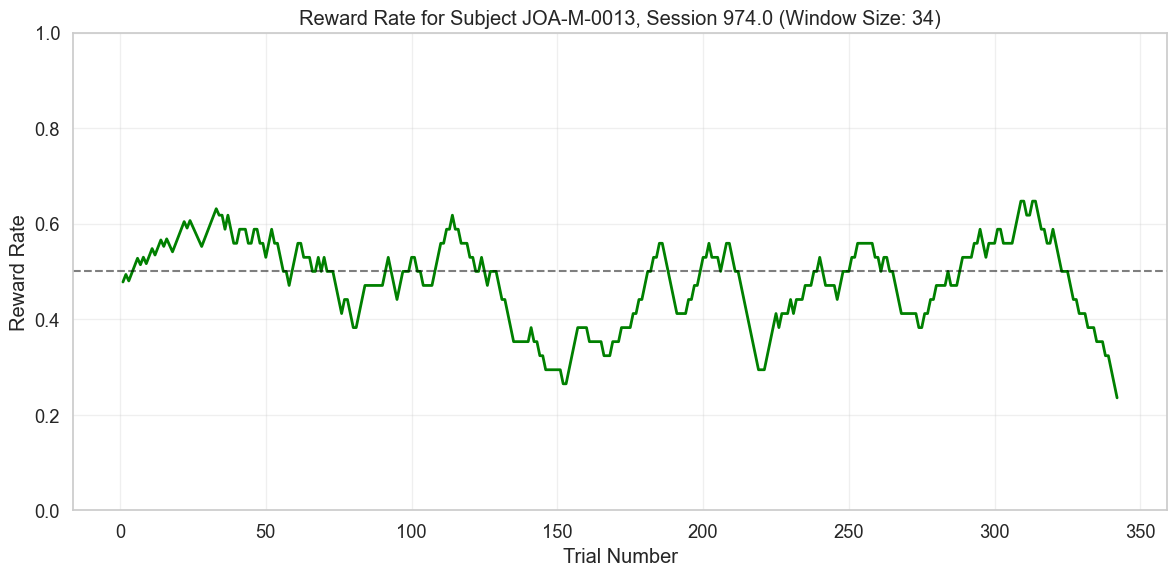

In [11]:
fig = plot_reward_rate(df, subject_id, session_id, use_window_size=False)
plt.show()
plt.close(fig)

## 3. Plot Probability of Left Choice

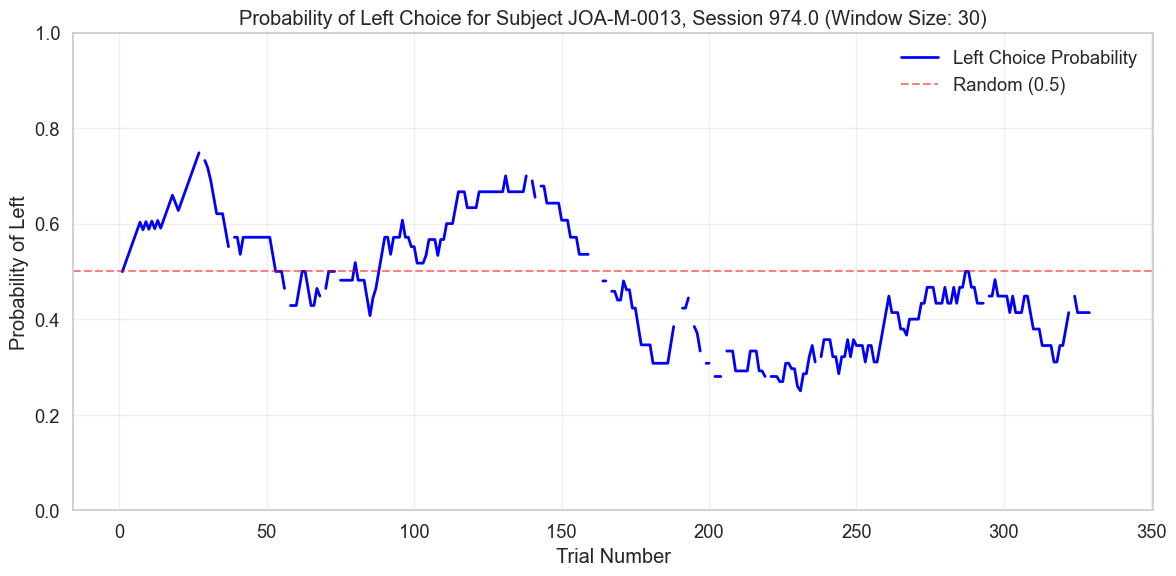

In [12]:
fig = plot_prob_left(df, subject_id, session_id, use_window_size=False)
plt.show()
plt.close(fig)

## 4. Plot Computer Prediction History

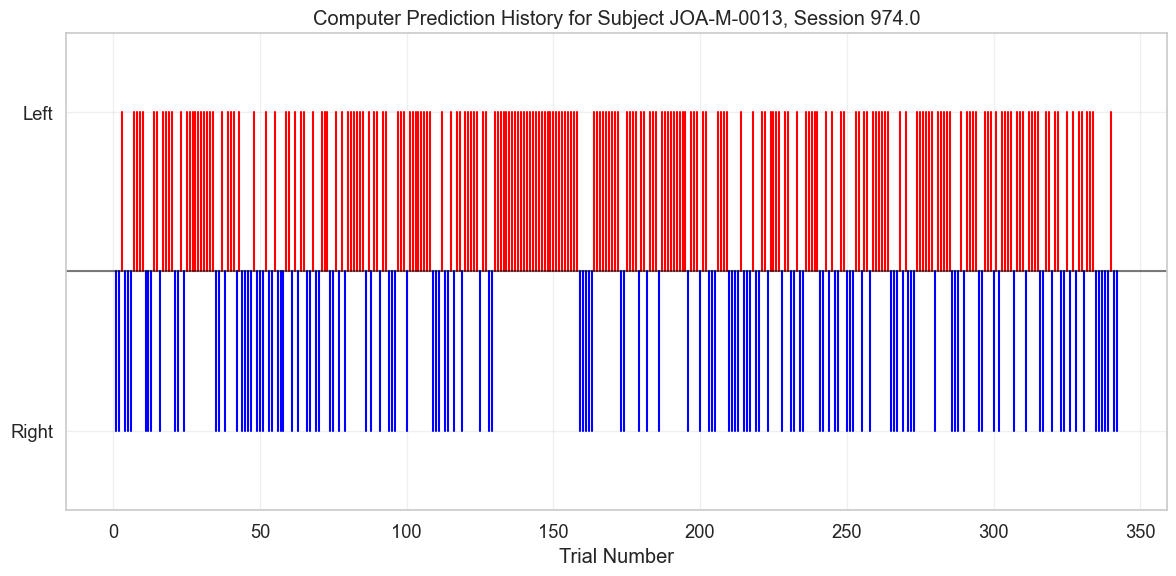

In [13]:
fig = plot_prediction_history(df, subject_id, session_id)
plt.show()
plt.close(fig)

## 5. Plot Computer Confidence

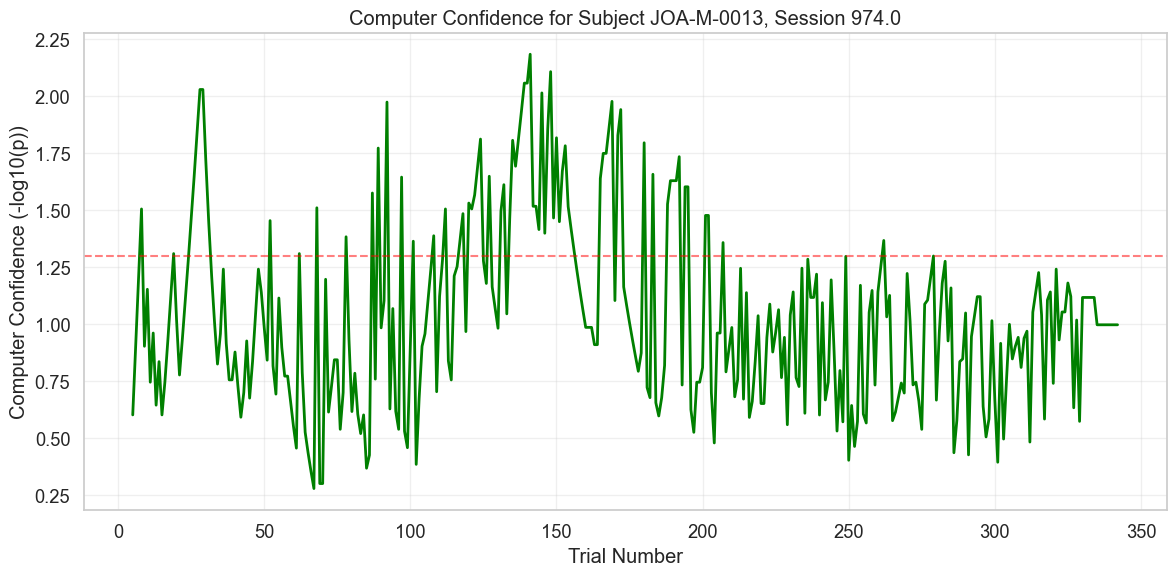

In [14]:
fig = plot_computer_confidence(df, subject_id, session_id)
plt.show()
plt.close(fig)

## 6. Analyze Choice Patterns

In [ ]:
fig = analyze_patterns(df, subject_id, session_id)
plt.show()
plt.close(fig)

## Run All Analyses and Save Results

In [ ]:
analyses = analyze_subject(df, subject_id, session_id, show_plots=True)

## Pooled Analysis of Learning Parametrics across all Animals

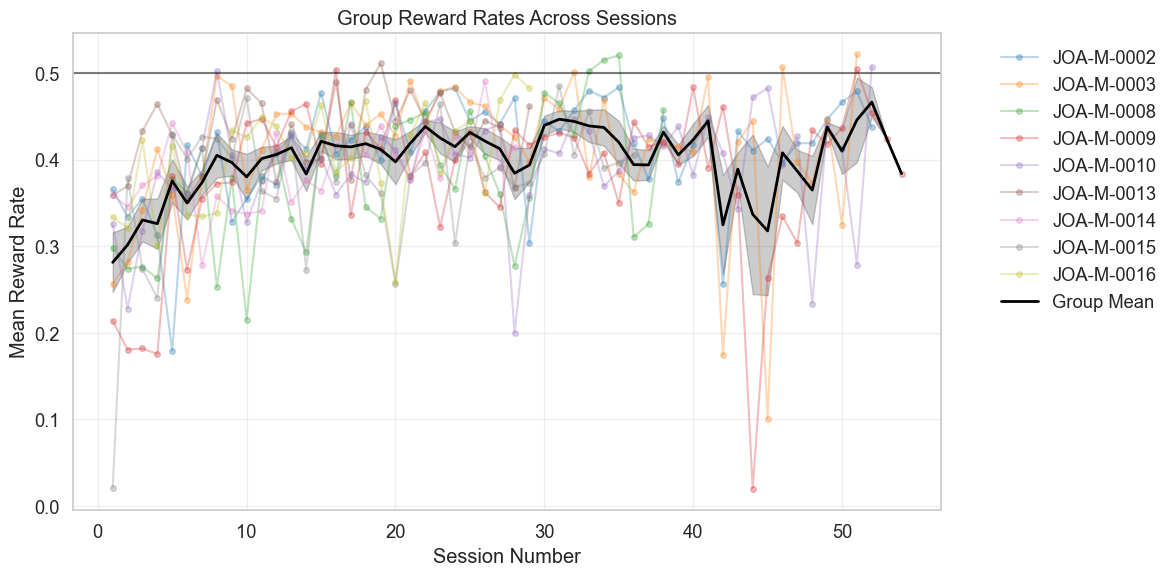

[6.71750299 6.13880603 5.65253307 6.68531893 4.19783734 4.47301271
 4.1617163  2.66870345 2.56319694 3.82171265 2.97181014 2.63637927
 2.54347216 2.71360931 1.84913719 2.45689987 2.14085476 2.92557317
 2.94283101 2.10403715 2.03089436 1.53376729 3.20639452 2.76770627
 2.37455427 2.41754036 2.14185472 2.70506655 2.51798388 1.74681245
 1.664048   2.02512617 1.50870366 2.20177785 2.84495329 2.82790366
 4.5108013  1.51625499 2.47653936 2.16693105 1.77433492 3.7208315
 3.37426096 3.3893943  3.57961509 3.08064626 2.84338254 2.79170345
 2.75928943 6.38338866 5.95362886 3.26860698 1.88183033 2.50563636]


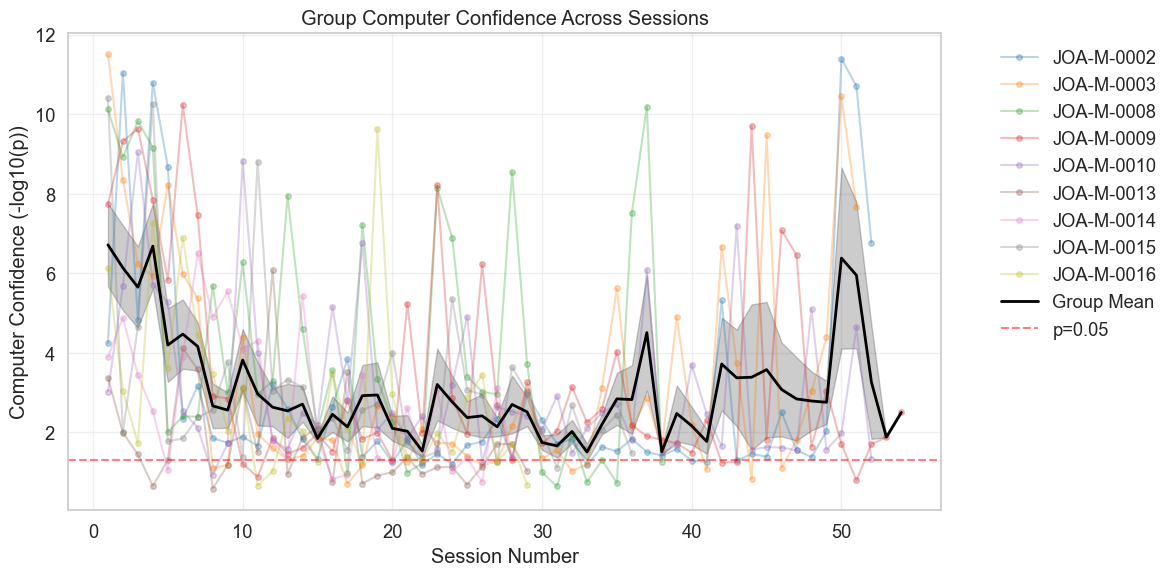

In [3]:
subject_ids = [
    'JOA-M-0002', 
    'JOA-M-0003', 
    'JOA-M-0008', 
    'JOA-M-0009', 
    'JOA-M-0010', 
    'JOA-M-0013', 
    'JOA-M-0014', 
    'JOA-M-0015', 
    'JOA-M-0016'
]
#only include where "protocol" contains f"matching_pennies" .str.contains("MatchingPennies")

reward_fig = plot_group_reward_rates(df, subject_ids)
plt.show()

confidence_fig = plot_group_confidence(df, subject_ids)
plt.show()